#TUTORIAL: LOCAL FEATURE BASED VISUAL SEARCH


# Step 1 - Preparation
This step setups a connection between the Colab server to the Google Drive server (authenticated by your Google account). By this way, you can synchronize the computational machine with your personal data.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Check GDrive connection
# NOTE: You should change this path based on your real configuration
tutorial_path = '/content/drive/MyDrive/1. Teaching/Information Retrieval/Tutorial/'
%cd '$tutorial_path'

/content/drive/MyDrive/1. Teaching/Information Retrieval/Tutorial


Next step, please install OpenCV version 3.4.2.17 (checked, not sure for other even new version)

In [3]:
!pip install opencv-python==3.4.2.17
!pip install opencv-contrib-python==3.4.2.17

     |████████████████████████████████| 25.0MB 116kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 30.6MB 73kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


Test the installation progress is success or not.

In [4]:
%matplotlib inline
import sys
# Works in command line but for Jupyter including cv2 python env necessary. I guess it's part of python lib hell
import cv2
import numpy as np
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Step 2 - Read and display image

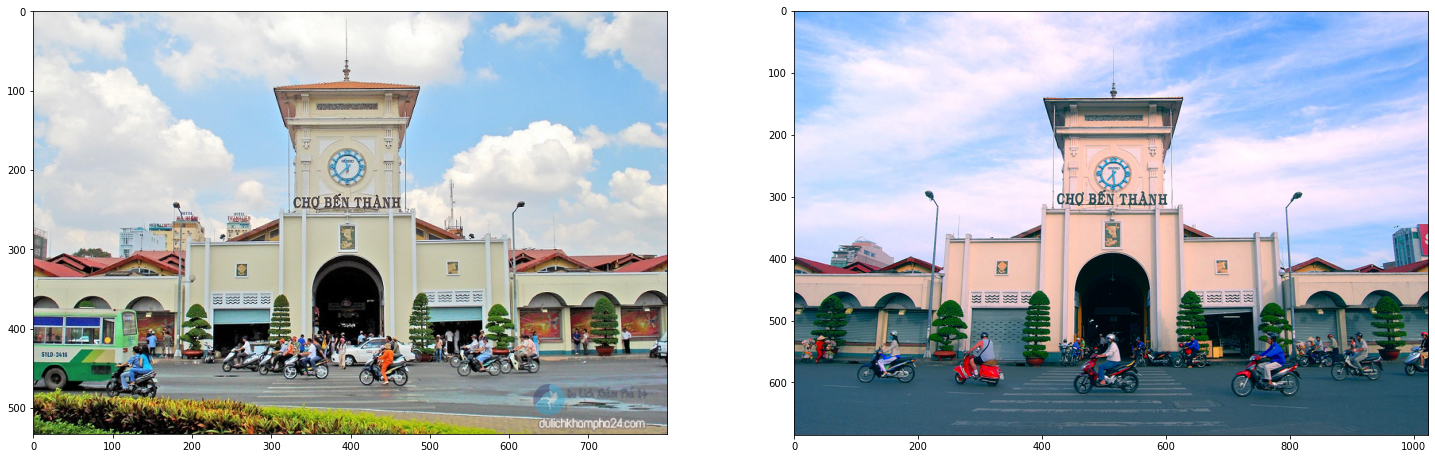

In [9]:
img1_path = tutorial_path + 'data/image/cho_ben_thanh_01.jpg'
img2_path = tutorial_path + 'data/image/cho_ben_thanh_03.jpg'
#img2_path = tutorial_path + 'data/image/cho_ben_thanh_02.png'
img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)
fig = plt.figure(figsize=(25, 50)) # parallel display of images
fig.add_subplot(1,2,1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
fig.add_subplot(1,2,2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

# Step 3 - Detect and describe SIFT features

In [10]:
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
#img_with_kp = cv2.drawKeypoints(img1,kp1,img_with_kp)

# Step 4 - Match local features using FLANN (Fast Library for Approximate Nearest Neighbor)

In [11]:
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

# Step 5 - Visualize results

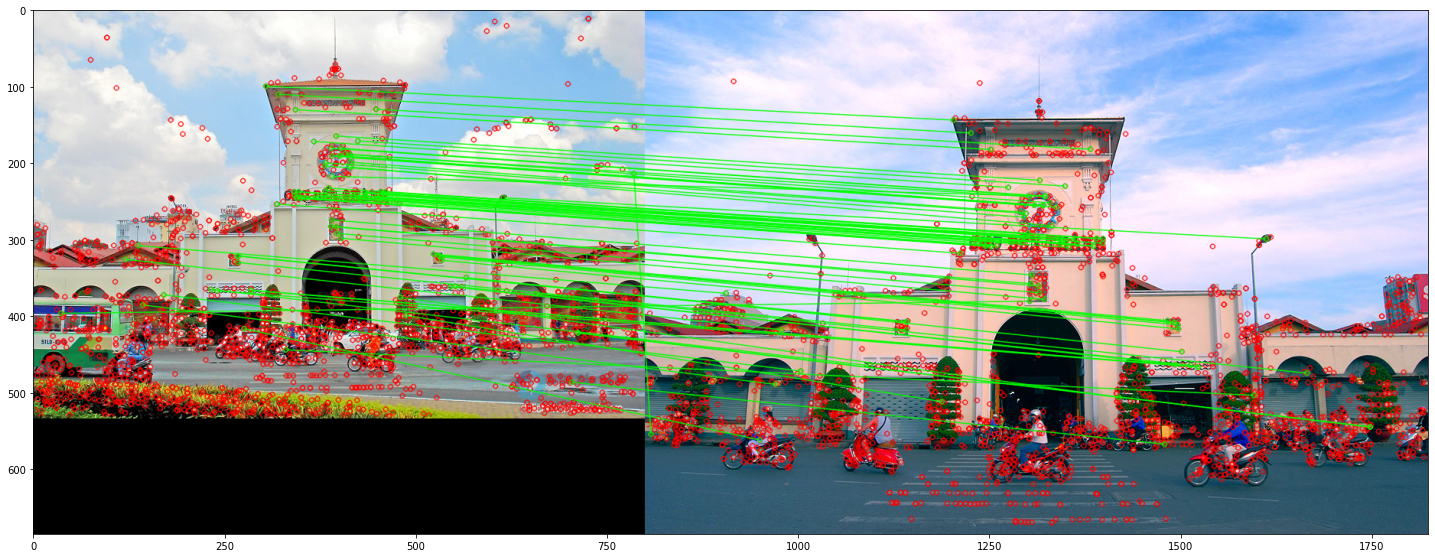

(<matplotlib.image.AxesImage at 0x7f8d7ab03090>, None)

In [12]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv2.DrawMatchesFlags_DEFAULT)
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.figure(figsize=(25, 50))
plt.imshow(img3,),plt.show()